In [1]:
import time
import random
import matplotlib.pyplot as plt
from copy import deepcopy

def time_it(func):
    def wrapper(*args, **kwargs):
        start = time.perf_counter_ns()
        result = func(*args, **kwargs)
        end = time.perf_counter_ns()
        return (end - start), result
    return wrapper

def generate_random_array(n):
    return [random.randint(0, n) for i in range(n)]

  <body>
    <h1 style="text-align: center; font-weight: bold;">Quick Sort</h1>
    <p>Quick sort is a popular sorting algorithm that uses a divide-and-conquer approach to sort an array or list of elements. It works by selecting a pivot element from the array, partitioning the array around the pivot, and recursively sorting the sub-arrays on either side of the pivot. The algorithm has an average time complexity of O(n log n), making it very efficient for large data sets. However, in the worst case scenario, quick sort can have a time complexity of O(n^2), making it less efficient than other sorting algorithms such as merge sort in certain cases.</p>
    <b>Quicksort Algorithm Pseudocode:</b>

<pre>
algorithm quicksort(A, lo, hi) is 
  if lo >= 0 && hi >= 0 && lo &lt; hi then
    p := partition(A, lo, hi) 
    quicksort(A, lo, p) // Note: the pivot is now included
    quicksort(A, p + 1, hi) 

algorithm partition(A, lo, hi) is 
  // Pivot value
  pivot := A[ floor((hi + lo) / 2) ] // The value in the middle of the array

  // Left index
  i := lo - 1 

  // Right index
  j := hi + 1

  loop forever 
    // Move the left index to the right at least once and while the element at
    // the left index is less than the pivot
    do i := i + 1 while A[i] &lt; pivot
    
    // Move the right index to the left at least once and while the element at
    // the right index is greater than the pivot
    do j := j - 1 while A[j] &gt; pivot

    // If the indices crossed, return
    if i &gt;= j then return j
    
    // Swap the elements at the left and right indices
    swap A[i] with A[j]
</pre>

  </body>


In [2]:
# Function to find the partition position
def partition(array, low, high):
    # Choose the rightmost element as pivot
    pivot = array[high]

    # Pointer for greater element
    i = low - 1

    # Traverse through all elements
    # compare each element with pivot
    for j in range(low, high):
        if array[j] <= pivot:
            # If element smaller than pivot is found
            # swap it with the greater element pointed by i
            i = i + 1

            # Swapping element at i with element at j
            (array[i], array[j]) = (array[j], array[i])

    # Swap the pivot element with
    # e greater element specified by i
    (array[i + 1], array[high]) = (array[high], array[i + 1])

    # Return the position from where partition is done
    return i + 1

# Function to perform quicksort

@time_it
def quickSort(array, low, high):
    if low < high:

        # Find pivot element such that
        # element smaller than pivot are on the left
        # element greater than pivot are on the right
        pi = partition(array, low, high)

        # Recursive call on the left of pivot
        quickSort(array, low, pi - 1)

        # Recursive call on the right of pivot
        quickSort(array, pi + 1, high)

In [3]:
arr = generate_random_array(10)
print(F"""Unsorted array {arr}""")
print(quickSort(arr, 0, 9))
print(f"""Sorted array {arr}""")

Unsorted array [6, 2, 1, 4, 5, 0, 8, 3, 4, 7]
(24800, None)
Sorted array [0, 1, 2, 3, 4, 4, 5, 6, 7, 8]



<h1 style="text-align: center; font-weight: bold;">Merge Sort</h1>
<p>Merge sort is a divide-and-conquer algorithm that works by recursively dividing an array into two halves, sorting each half, and then merging the sorted halves back together. It has a time complexity of O(nlogn), which makes it an efficient algorithm for sorting large amounts of data. The key idea behind merge sort is that it is easier to merge two sorted arrays into a single sorted array than it is to sort an unsorted array.</p>
<b>Merge Sort Algorithm Pseudocode:</b>

<pre>
algorithm merge_sort(A) is
    if length(A) ≤ 1 then
        return A
    else
        mid ← length(A) / 2
        left ← merge_sort(A[1..mid])
        right ← merge_sort(A[mid+1..length(A)])
        return merge(left, right)

algorithm merge(left, right) is
    result ← []
    while length(left) > 0 and length(right) > 0 do
        if first(left) ≤ first(right) then
            append first(left) to result
            left ← rest(left)
        else
            append first(right) to result
            right ← rest(right)
    // either left or right may have elements left
    while length(left) > 0 do
        append first(left) to result
        left ← rest(left)
    while length(right) > 0 do
        append first(right) to result
        right ← rest(right)
    return result
</pre>


In [4]:
@time_it
def mergeSort(arr):
    if len(arr) > 1:
 
         # Finding the mid of the array
        mid = len(arr)//2
 
        # Dividing the array elements
        L = arr[:mid]
 
        # into 2 halves
        R = arr[mid:]
 
        # Sorting the first half
        mergeSort(L)
 
        # Sorting the second half
        mergeSort(R)
 
        i = j = k = 0
 
        # Copy data to temp arrays L[] and R[]
        while i < len(L) and j < len(R):
            if L[i] <= R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1
 
        # Checking if any element was left
        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1
 
        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1

In [5]:
arr = generate_random_array(10)
print(f"""Unsorted array {arr}""")
mergeSort(arr)
print(f"""Sorted array {arr}""")

Unsorted array [7, 6, 5, 9, 4, 9, 1, 4, 5, 4]
Sorted array [1, 4, 4, 4, 5, 5, 6, 7, 9, 9]


<h1 style="text-align: center; font-weight: bold;">Heap Sort</h1>
<p>Heap sort is a comparison-based sorting algorithm that uses the concept of a binary heap to sort an array of elements. It starts by building a max heap from the array, then repeatedly extracts the maximum element from the heap and places it at the end of the array. This process is repeated until the entire array is sorted. Heap sort has a time complexity of O(n log n) in the worst case and is an in-place sorting algorithm.</p>

<b>Heap Sort Algorithm Pseudocode:</b>

<pre>
algorithm heapsort(A) is
    heapify(A)  // Build a max heap from the array
    end ← length(A) - 1
    while end > 0 do
        // Swap the root node (which is the largest element in the heap) with
        // the last node in the heap, then "remove" the last node by decreasing
        // the heap size (i.e. the end index)
        swap A[end] with A[0]
        end ← end - 1
        // "Sift down" the root node to restore the max heap property
        sift_down(A, 0, end)

algorithm heapify(A) is
    // Start with the last non-leaf node (i.e. the parent of the last leaf node)
    start ← parent(length(A) - 1)
    while start ≥ 0 do
        // "Sift down" the current node to restore the max heap property
        sift_down(A, start, length(A) - 1)
        start ← start - 1

algorithm sift_down(A, start, end) is
    root ← start
    while left_child(root) ≤ end do
        child ← left_child(root)
        // Choose the child node with the greatest value
        if child + 1 ≤ end and A[child] < A[child + 1] then
            child ← child + 1
        // If the root node has a greater value than its child, stop sifting
        if A[root] ≥ A[child] then
            return
        // Otherwise, swap the root node with its child and continue sifting
        swap A[root] with A[child]
        root ← child
</pre>


In [6]:
def heapify(arr, N, i):
    largest = i  # Initialize largest as root
    l = 2 * i + 1     # left = 2*i + 1
    r = 2 * i + 2     # right = 2*i + 2
 
    # See if left child of root exists and is
    # greater than root
    if l < N and arr[largest] < arr[l]:
        largest = l
 
    # See if right child of root exists and is
    # greater than root
    if r < N and arr[largest] < arr[r]:
        largest = r
 
    # Change root, if needed
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]  # swap
 
        # Heapify the root.
        heapify(arr, N, largest)
 
# The main function to sort an array of given size
 
@time_it 
def heapSort(arr):
    N = len(arr)
 
    # Build a maxheap.
    for i in range(N//2 - 1, -1, -1):
        heapify(arr, N, i)
 
    # One by one extract elements
    for i in range(N-1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]  # swap
        heapify(arr, i, 0)
    return arr

In [7]:
arr = generate_random_array(10)
print(f"""Unsorted array {arr}""")
print(f"""sorted array {heapSort(arr)[1]}""")

Unsorted array [7, 2, 6, 4, 9, 4, 6, 2, 3, 8]
sorted array [2, 2, 3, 4, 4, 6, 6, 7, 8, 9]


<h1 style="text-align: center; font-weight: bold;">Tim Sort</h1>
<p>Timsort is a sorting algorithm that combines the best of both insertion sort and merge sort algorithms. It was designed to perform well on many kinds of real-world data, and is especially efficient on partially ordered data. Timsort first divides the input into small runs, and then merges the runs using a modified merge sort algorithm. It was developed by Tim Peters in 2002, and has been adopted as the default sorting algorithm for many programming languages, including Python, Java, and C# .
</p>


<b>Timsort pseudocode in python</b>
<pre>
<code>
def timsort(arr):
    # Determine the minimum size of each run
    min_run = min_run_length(len(arr))

    # Divide the array into runs
    runs = []
    start = 0
    while start &lt; len(arr):
        end = start + min_run
        if end &gt; len(arr):
            end = len(arr)
        runs.append(insertion_sort(arr[start:end]))
        start = end

    # Merge the runs
    while len(runs) &gt; 1:
        a = runs.pop(0)
        b = runs.pop(0)
        runs.append(merge(a, b))

    return runs[0]


def insertion_sort(arr):
    for i in range(1, len(arr)):
        j = i
        while j &gt; 0 and arr[j] &lt; arr[j - 1]:
            arr[j], arr[j - 1] = arr[j - 1], arr[j]
            j -= 1
    return arr


def merge(a, b):
    result = []
    while len(a) &gt; 0 and len(b) &gt; 0:
        if a[0] &lt;= b[0]:
            result.append(a.pop(0))
        else:
            result.append(b.pop(0))
    result += a
    result += b
    return result


def min_run_length(n):
    r = 0
    while n &gt;= 64:
        r |= n &amp; 1
        n &gt;&gt;= 1
    return n + r
</code>
</pre>

In [8]:
@time_it
def pythonSort(arr):
    return sorted(arr)



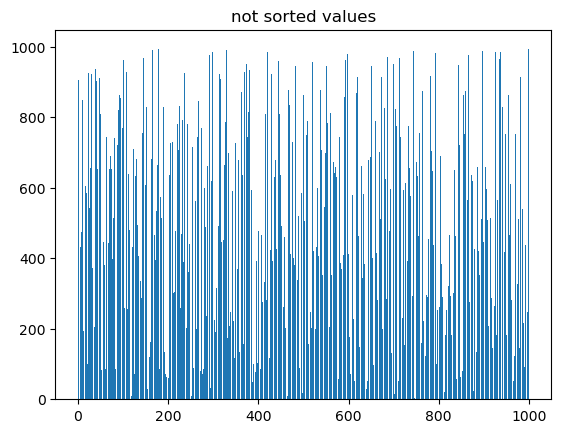

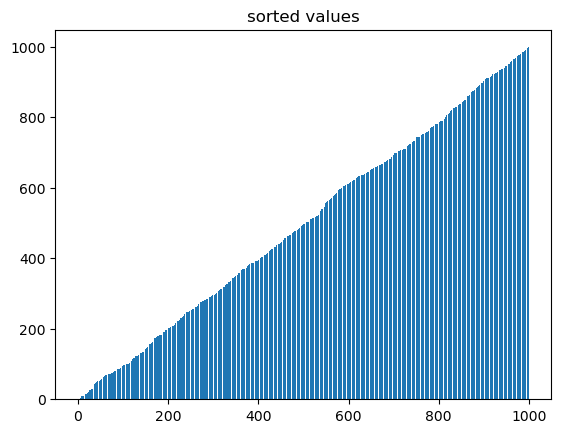

In [18]:
not_sorted = generate_random_array(1000)
plt.bar([i for i in range(len(not_sorted))], not_sorted)
plt.title(label="not sorted values")
plt.show()

time1 = quickSort(not_sorted, 0, len(not_sorted) - 1)[0]

plt.bar([i for i in range(len(not_sorted))], not_sorted)
plt.title(label="sorted values")
plt.show()

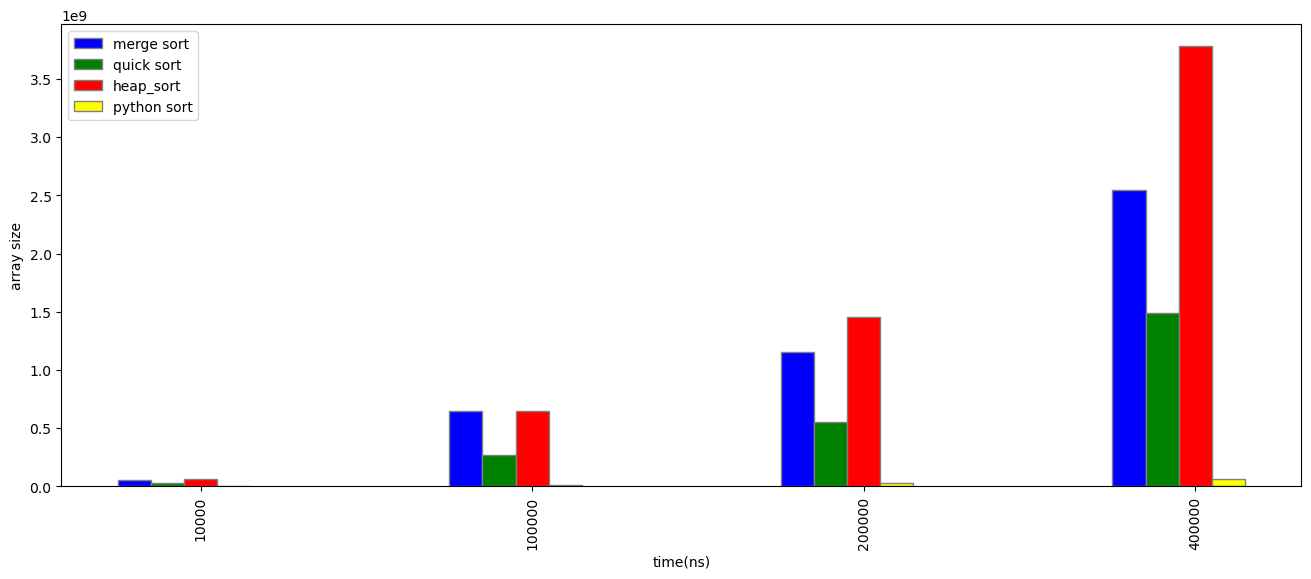

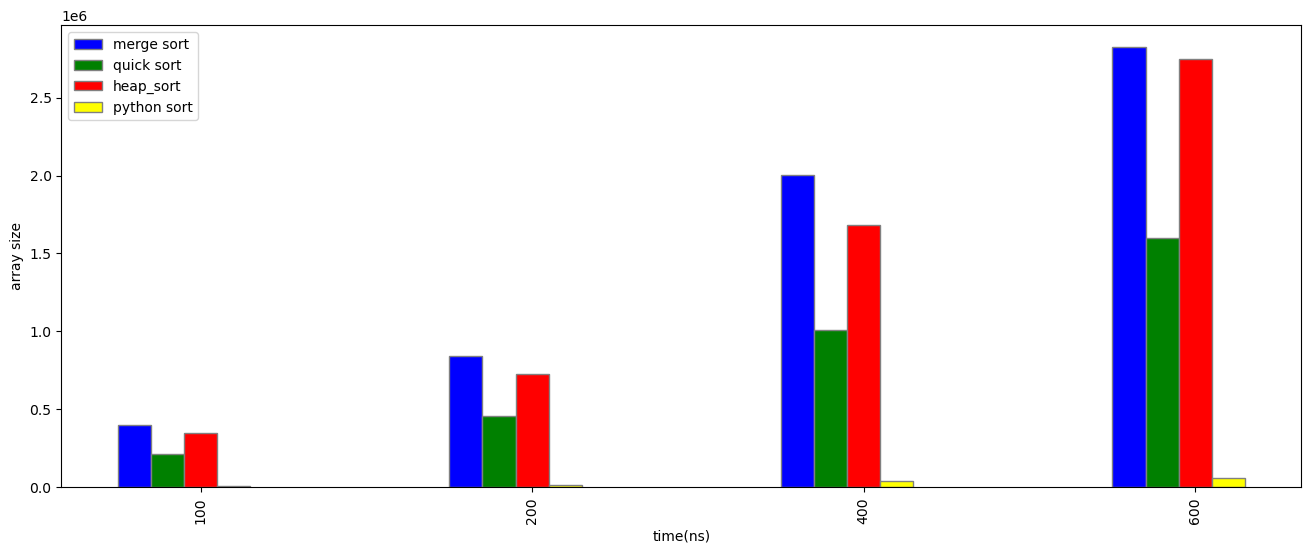

In [17]:
def plot_sorts(labels):
    merge_sort = []
    quick_sort = []
    heap_sort = []
    python_sort = []
    for value in labels:
        not_sorted = generate_random_array(int(value))
        merge_sort.append(mergeSort(deepcopy(not_sorted))[0])
        heap_sort.append(heapSort(deepcopy(not_sorted))[0])
        python_sort.append(pythonSort(deepcopy(not_sorted))[0])
        quick_sort.append(quickSort(not_sorted, 0, len(not_sorted) - 1)[0])


    barWidth = 0.1
    fig = plt.subplots(figsize =(16, 6))

    br1 = [i for i in range(len(labels))]
    br2 = [x + barWidth for x in br1]
    br3 = [x + barWidth for x in br2]
    br4 = [x + barWidth for x in br3]

    plt.bar(br1, merge_sort, color ='blue', width = barWidth,
            edgecolor ='grey', label ='merge sort')
    plt.bar(br2, quick_sort, color ='green', width = barWidth,
            edgecolor ='grey', label ='quick sort')
    plt.bar(br3, heap_sort, color ='red', width = barWidth,
            edgecolor ='grey', label ='heap_sort')
    plt.bar(br4, python_sort, color ='yellow', width = barWidth,
            edgecolor ='grey', label ='python sort')

    # Adding Xticks
    plt.xlabel('array size')
    plt.ylabel('time(ns)')
    plt.xticks([r + barWidth * 2 for r in range(len(labels))],
            labels, rotation=90)

    plt.legend()
    plt.show()

plot_sorts(['10000', '100000', '200000', '400000'])
plot_sorts(['100', '200', '400', '600'])